# Kruisjes en rondjes visualiseren #

In [48]:
import numpy as np
import random
from matplotlib import pyplot as plt
from data import training_set, test_set

### Classes ###

Met behulp van de uitleg in de les zijn de volgende classes opgesteld. De classes gedragen zich als een linked list. Door de waarde op te vragen van een Node worden alle links en nodes die achter die node liggen aangesproken voor een waarde.

In [49]:
class Node:
    def __init__(self):
        self.value = 0
        self.links = []

    def getValue(self):
        if(len(self.links)==0):
            return self.value
        
        self.value = sum(link.getValue() for link in self.links)
        return self.value

class Link:
    def __init__(self, inNode, outNode):
        self.weight = 1
        self.inNode = inNode
        outNode.links.append(self)

    def getValue(self):
        value = self.weight * self.inNode.getValue()
        return value

### Functies ###

De functie train wordt gebruikt om het model te trainen met de training set. Het aantal cycli dat het model gaat trainen wordt meegegeven. Na het invullen van de input data wordt back propagation gebruikt om de weights aan te passen. 

De functie forward propogation vult de input nodes in met input data.

De functie backward propogation kijkt hoe ver de voorspelde output van de gewenst output afzat en op basis daarvan worden de weights aangepast in het model. Hierdoor heeft het model "geleerd" van zijn fout.

De functie predict stopt de input data in het model en kijkt welke voorspelling in de output nodes staan. Vervolgens wordt de softmax functie toegepast om een uitspraak te kunnen doen of de input een kruisje of een rondje is.

In [50]:
def train(learning_rate, epochs):
    for i in range(epochs):
        for example, target in training_set:
            inputs = np.array(example).flatten()
            forward_propagation(inputs)

            targets = [1.0, 0.0] if target == "O" else [0.0, 1.0]
            backward_propagation(targets, learning_rate)

def forward_propagation(inputs):
    global input_size      
    global inputNodes   
    # Input values instellen uit de dataset   
    for i in range(input_size):
        inputNodes[i].value = inputs[i]
    
def backward_propagation(targets, learning_rate):
    global output_size
    global outputNodes
    # Weights aanpassen 
    for j in range(output_size):
        output_node = outputNodes[j]
        output_error = targets[j] - output_node.getValue()
        for link in output_node.links:
            delta_weight = learning_rate * output_error * link.inNode.getValue()
            link.weight += delta_weight

def predict(inputs):
    forward_propagation(inputs)
    # Softmax function toepassen
    total_output = sum(np.exp(node.getValue()) for node in outputNodes)
    return [np.exp(node.getValue()) / total_output for node in outputNodes]

### Test en train model ###

Het model wordt getraind met de trainingset. Vervolgens wordt er een uitspraak gedaan over de test data. De test data wordt gevisualiseerd met als titel "Gewenst antwoord : voorspeld antwoord".

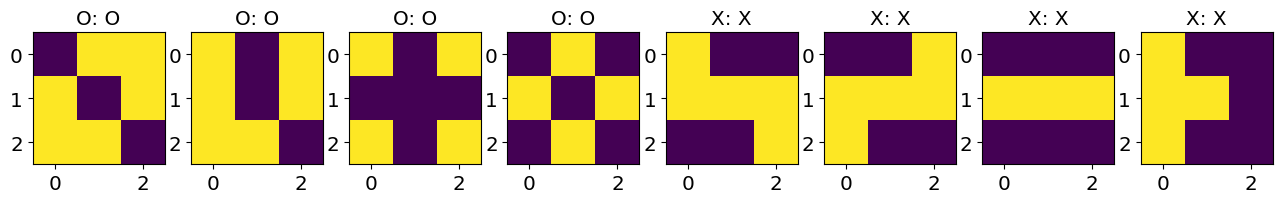

In [57]:
input_size = 9
output_size = 2
learning_rate = 0.01
epochs = 1_000

inputNodes = [Node() for i in range(input_size)]
outputNodes = [Node() for i in range(output_size)]

links = [Link(inputNode,outputNode) for inputNode in inputNodes for outputNode in outputNodes ]

train(learning_rate, epochs)

figure, axis = plt.subplots(1,len(test_set)) 
for i in range(len(test_set)):
    inputs = np.array(test_set[i][0]).flatten()
    prediction = predict(inputs)

    axis[i].imshow(test_set[i][0])
    antwoord = "O" if prediction[0] > prediction[1] else "X"
    title  = f"{test_set[i][1]}: {antwoord}"
    axis[i].set_title(title)
